In [36]:
# import all modules required for the analyses
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.api import GLM
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from statsmodels.stats.api import anova_lm
import statsmodels.formula.api as smf

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
try :
    dir_path = r"F:\Dropbox\EM Lyon\5A2F14_Advanced_Statistics\Generalized Linear Models\data"
    os.chdir(dir_path)
except :
    dir_path = r"D:\Dropbox\EM Lyon\5A2F14_Advanced_Statistics\Generalized Linear Models\data"
    os.chdir(dir_path)    

In [4]:
# change working directory
os.chdir(dir_path)
os.getcwd()

'D:\\Dropbox\\EM Lyon\\5A2F14_Advanced_Statistics\\Generalized Linear Models\\data'

In [5]:
# read the heart data
df = pd.read_excel("heart_data.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       20 non-null     int64 
 1   max_rate  20 non-null     int64 
 2   angina    20 non-null     object
 3   heart     20 non-null     object
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


,age,max_rate,angina,heart
0,50,126,Yes,presence
1,49,126,No,presence
2,46,144,No,presence
3,49,139,No,presence
4,62,154,Yes,presence


In [6]:
df["angina"] = df["angina"].replace({"Yes":1, "No":0}).astype('category')
df["heart"] = df["heart"].replace({"presence":1, "absence":0}).astype('category')

In [7]:
df["angina"].value_counts()

0    15
1     5
Name: angina, dtype: int64

In [8]:
df["heart"].value_counts()

0    14
1     6
Name: heart, dtype: int64

## Model 1 : `angina` the only predictor of heart condition

In [18]:
y = df["heart"]
X = sm.add_constant(df["angina"])

In [19]:
# simple model with one categorical (binary predictor)
logit_1 = GLM(y, X, family=sm.families.Binomial())
res_1 = logit_1.fit()

In [20]:
# print a first summary type
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  heart   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.871
Date:                Wed, 22 Feb 2023   Deviance:                       21.742
Time:                        17:37:25   Pearson chi2:                     20.0
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1260
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3863      0.645     -2.148      0.032      -2.651      -0.121
angina         1.7918      1.118      1.603      0.109      -0.400       3.983
==============================================================================
"""

In [23]:
# print a second type of summary
res_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            25.7422 
Link Function:      Logit            BIC:            -32.1810
Dependent Variable: heart            Log-Likelihood: -10.871 
Date:               2023-02-22 17:38 LL-Null:        -12.217 
No. Observations:   20               Deviance:       21.742  
Df Model:           1                Pearson chi2:   20.0    
Df Residuals:       18               Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------
const     -1.3863    0.6455  -2.1476  0.0317  -2.6514  -0.1211
angina     1.7918    1.1180   1.6026  0.1090  -0.3995   3.9831
=============================================================

"""

In [24]:
res_1.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-1.386294,0.645497,-2.147639,0.031742,-2.651445,-0.121143
angina,1.791759,1.118034,1.602599,0.109023,-0.399547,3.983066


In [25]:
res_1_df = pd.DataFrame(res_1.summary2().tables[1])
res_1_df["Odds Ratio"] = np.exp(res_1_df["Coef."])
res_1_df

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],Odds Ratio
const,-1.386294,0.645497,-2.147639,0.031742,-2.651445,-0.121143,0.25
angina,1.791759,1.118034,1.602599,0.109023,-0.399547,3.983066,6.00


In [26]:
dir(res_1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_data_attr_model',
 '_data_in_cache',
 '_endog',
 '_freq_weights',
 '_get_robustcov_results',
 '_iweights',
 '_n_trials',
 '_use_t',
 '_var_weights',
 'aic',
 'bic',
 'bic_deviance',
 'bic_llf',
 'bse',
 'conf_int',
 'converged',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'deviance',
 'df_model',
 'df_resid',
 'f_test',
 'family',
 'fit_history',
 'fittedvalues',
 'get_hat_matrix_diag',
 'get_influence',
 'get_prediction',
 'info_criteria',
 'initialize',
 'k_constant',
 'llf',
 'llf_scaled',
 'llnull',
 'load',
 'method',
 'mle_settings',
 'model',
 'mu',
 'nobs',
 'normalized_cov_params',
 'nul

In [31]:
pred_proba_1 = res_1.predict(sm.add_constant(df['angina']))
pred_proba_1

0     0.6
1     0.2
2     0.2
3     0.2
4     0.6
5     0.6
6     0.2
7     0.2
8     0.2
9     0.2
10    0.6
11    0.2
12    0.2
13    0.2
14    0.2
15    0.2
16    0.6
17    0.2
18    0.2
19    0.2
dtype: float64

In [32]:
pred_proba_1_prim = res_1.get_prediction().predicted_mean

In [33]:
(pred_proba_1.values == pred_proba_1_prim).mean()

1.0

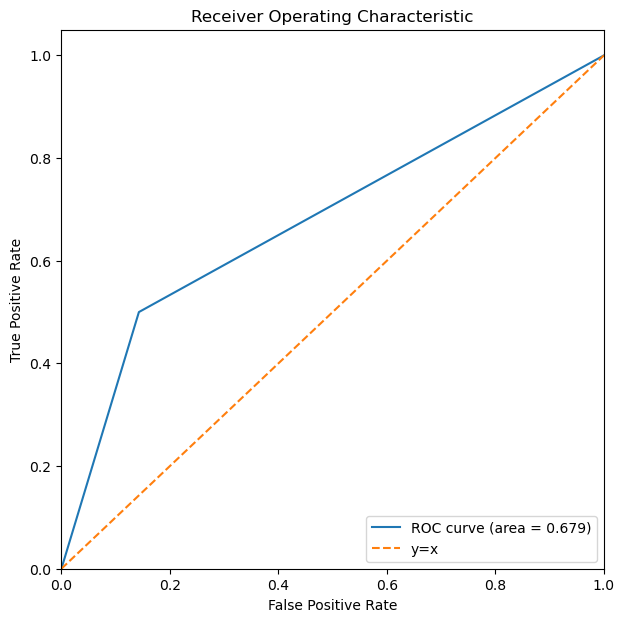

In [37]:
# Calculate the True Positive Rate and False Positive Rate for different thresholds
fpr, tpr, thresholds = roc_curve(df['heart'], pred_proba_1)

# Plot the ROC curve
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='y=x')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [40]:
threshold = 0.5
pred_1 = np.where(pred_proba_1 > threshold, 1, 0)
pred_1

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [41]:
confusion_matrix(df['heart'], pred_1)

array([[12,  2],
       [ 3,  3]], dtype=int64)

In [72]:
df_confusion_1 = pd.DataFrame(confusion_matrix(df['heart'], pred_1), 
                            index=['actual negative', 'actual positive'], columns=['predicted negative', 'predicted positive'])
df_confusion_1['column margin']=df_confusion_1.sum(axis=1)
df_confusion_1.loc['row margin'] = df_confusion_1.sum(axis=0)

In [73]:
df_confusion_1

,predicted negative,predicted positive,column margin
actual negative,12,2,14
actual positive,3,3,6
row margin,15,5,20


In [44]:
print(classification_report(df['heart'], pred_1))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.70      0.68      0.69        20
weighted avg       0.74      0.75      0.74        20



## Model 2 : `all variables` predictors of hear condition

In [45]:
y = df["heart"]
X = sm.add_constant(df.drop(columns=["heart"]))

In [46]:
# simple model with one categorical (binary predictor)
logit_2 = GLM(y, X, family=sm.families.Binomial())
res_2 = logit_2.fit()

In [47]:
# print a first summary type
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  heart   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.3088
Date:                Wed, 22 Feb 2023   Deviance:                       16.618
Time:                        18:16:40   Pearson chi2:                     16.4
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3235
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4938      7.955      1.822      0.068      -1.097      30.085
age           -0.1256      0.094     -1.339      0.180      -0.309       0.058
max_rate      -0.0636      0.040     -1.572      0.116      -0.143       0.016
angina         1.7790      1.504      1.182      0.237      -1.170       4.728
==============================================================================
"""

In [48]:
# print a second type of summary
res_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Results: Generalized linear model
=============================================================
Model:              GLM              AIC:            24.6177 
Link Function:      Logit            BIC:            -31.3140
Dependent Variable: heart            Log-Likelihood: -8.3088 
Date:               2023-02-22 18:16 LL-Null:        -12.217 
No. Observations:   20               Deviance:       16.618  
Df Model:           3                Pearson chi2:   16.4    
Df Residuals:       16               Scale:          1.0000  
Method:             IRLS                                     
--------------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------
const     14.4938    7.9546   1.8221  0.0684  -1.0970  30.0846
age       -0.1256    0.0938  -1.3393  0.1805  -0.3095   0.0582
max_rate  -0.0636    0.0404  -1.5715  0.1161  -0.1428   0.0157
angina     1.7790    1.5045   1.1825  0.2370  -1.1697   4.7278
=============================================================

"""

In [49]:
res_2.summary2().tables[1]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,14.493791,7.954644,1.822054,0.068447,-1.097024,30.084605
age,-0.125634,0.093803,-1.339344,0.180459,-0.309484,0.058216
max_rate,-0.063560,0.040446,-1.571500,0.116066,-0.142832,0.015712
angina,1.779013,1.504491,1.182468,0.237020,-1.169735,4.727761


In [52]:
res_2_df = pd.DataFrame(res_2.summary2().tables[1])
res_2_df["Odds Ratio"] = np.exp(res_2_df["Coef."])
res_2_df

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],Odds Ratio
const,14.493791,7.954644,1.822054,0.068447,-1.097024,30.084605,1.970485e+06
age,-0.125634,0.093803,-1.339344,0.180459,-0.309484,0.058216,8.819375e-01
max_rate,-0.063560,0.040446,-1.571500,0.116066,-0.142832,0.015712,9.384175e-01
angina,1.779013,1.504491,1.182468,0.237020,-1.169735,4.727761,5.924006e+00


In [55]:
pred_proba_2 = res_2.predict(sm.add_constant(df.drop(columns=["heart"])))
pred_proba_2

0     0.878947
1     0.581545
2     0.392203
3     0.378208
4     0.213359
5     0.876555
6     0.016410
7     0.071037
8     0.377509
9     0.036248
10    0.858419
11    0.105754
12    0.103664
13    0.405660
14    0.124377
15    0.058366
16    0.172720
17    0.138185
18    0.137127
19    0.073707
dtype: float64

In [56]:
pred_proba_2_prim = res_2.get_prediction().predicted_mean

In [57]:
(pred_proba_2.values == pred_proba_2_prim).mean()

1.0

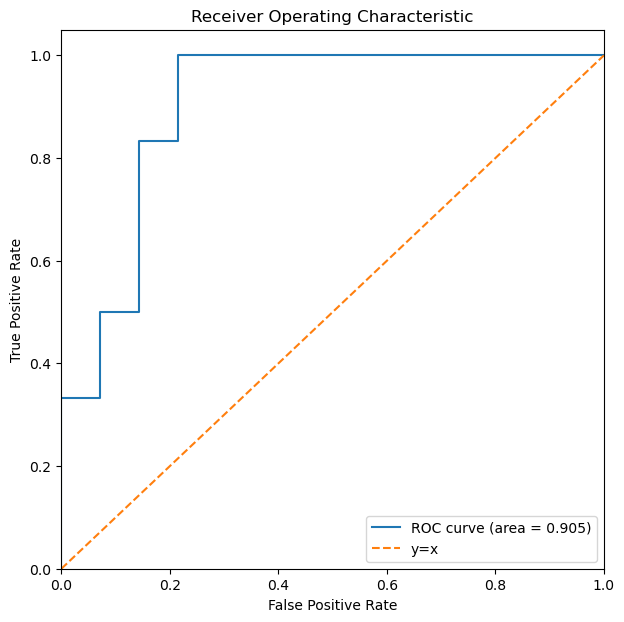

In [58]:
# Calculate the True Positive Rate and False Positive Rate for different thresholds
fpr, tpr, thresholds = roc_curve(df['heart'], pred_proba_2)

# Plot the ROC curve
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='y=x')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
threshold = 0.5
pred_2 = np.where(pred_proba_2 > threshold, 1, 0)
pred_2

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
df_confusion = pd.DataFrame(confusion_matrix(df['heart'], pred_2), 
                            index=['actual negative', 'actual positive'], columns=['predicted negative', 'predicted positive'])
df_confusion['column margin']=df_confusion.sum(axis=1)
df_confusion.loc['row margin'] = df_confusion.sum(axis=0)

In [69]:
df_confusion

,predicted negative,predicted positive,column margin
actual negative,13,1,14
actual positive,3,3,6
row margin,16,4,20


In [61]:
print(classification_report(df['heart'], pred_2))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.75      0.50      0.60         6

    accuracy                           0.80        20
   macro avg       0.78      0.71      0.73        20
weighted avg       0.79      0.80      0.79        20

